# Pymaceuticals Inc.
---

### Analysis

- Majority of the mouse that were part of this study were treated with Capomulin followed by Ramicane. When looking at the dataset based on gender, we can see that the distribution between male and female is somewhat even. 

- Based on our analysis we can see that mice treated with either Capomulin or Ramicane have smaller tumor volume than those treated with Infubinol or Ceftamine.

- The Capomulin treatment of mouse l509 shows an increase in tumor volume for the first couple of days, hitting it's peak at around day 20. After that we can see a significant improvement in volume. In a little less than 20 days we can see it drop from 48mm3 to about 40mm3.

- Our analysis also shows that tumor volume is higher on heavier mice. The heavier the mouse the more tumor volume we see.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Number of unique values as integer > https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas
merged_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Select duplicate rows based on more than one column > https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
dup_df = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
dup_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID'] == 'g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_SEM = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumor_df_dict = {
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_SEM
}

tumor_df = pd.DataFrame(tumor_df_dict)
tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# GroupBy.agg > https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
tumor_agg = clean_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Get total mouse count for each drug regimen
mouse_count = clean_df['Drug Regimen'].value_counts()
mouse_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

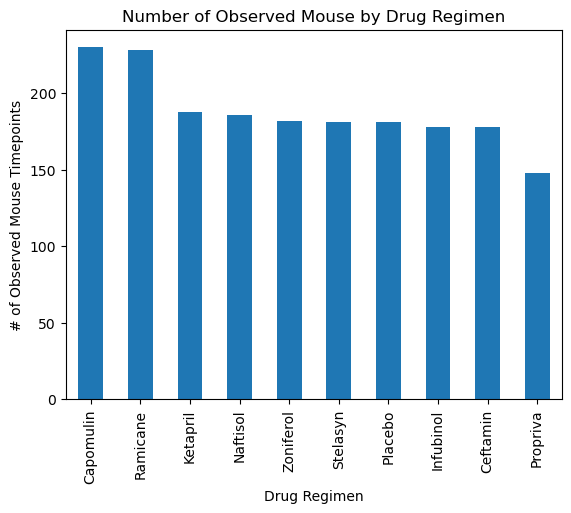

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count.plot(kind='bar',
                title='Number of Observed Mouse by Drug Regimen',
                xlabel='Drug Regimen',
                ylabel='# of Observed Mouse Timepoints')
plt.show()

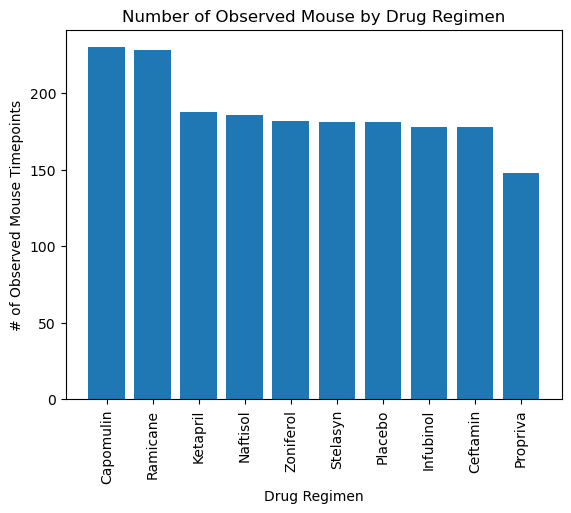

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set x and y axis
x_axis = mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis, y_axis, align='center')
plt.title('Number of Observed Mouse by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

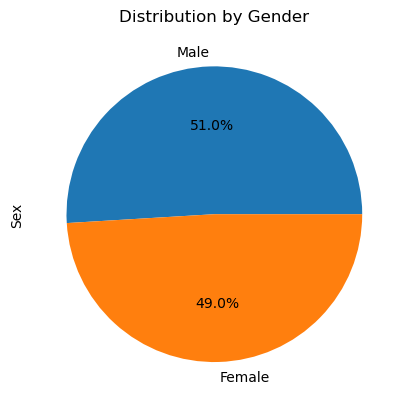

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get total count for each gender
gender_count = clean_df['Sex'].value_counts()

gender_count.plot(kind='pie', autopct = '%1.1f%%', 
                 title='Distribution by Gender', 
                 ylabel='Sex')
plt.show()

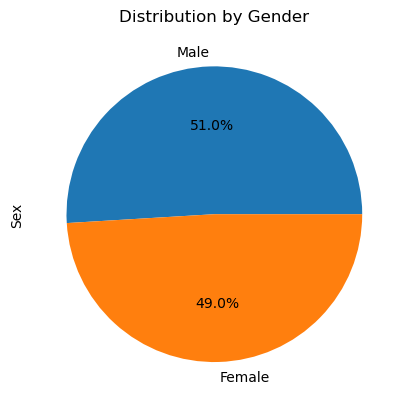

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ['Male','Female']
plt.pie(gender_count, labels=sex, autopct='%1.1f%%')
plt.title('Distribution by Gender')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID','Timepoint'])
tumor_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_Vol = []
Ramicane_Vol = []
Infubinol_Vol = []
Ceftamin_Vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# Loop through the tumor dataframe to append tumor volume for each treatment
for i in range (len(tumor_vol_df)-1):
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Capomulin':
        Capomulin_Vol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Ramicane':
        Ramicane_Vol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Infubinol':
        Infubinol_Vol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Ceftamin':
        Ceftamin_Vol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset 

# Create a list of the treatment tumor volume to use for IQR loop
treatment_tumor_vol = [Capomulin_Vol, Ramicane_Vol, Infubinol_Vol, Ceftamin_Vol]

for i in range (len(treatment_tumor_vol)):
    quartiles = pd.Series(treatment_tumor_vol[i]).quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin:
The lower quartile of tumor vol

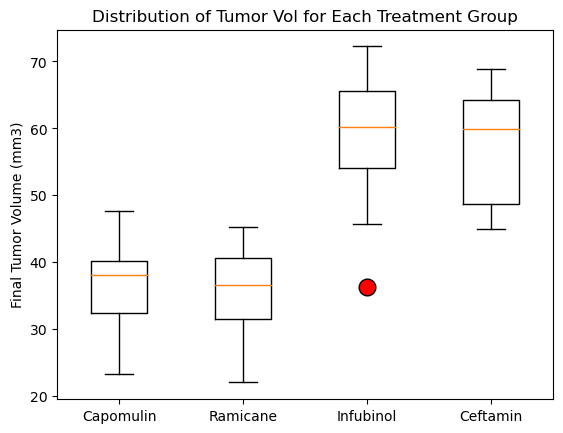

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Change outlier format > https://matplotlib.org/stable/gallery/statistics/boxplot.html
outlier_format = dict(marker ='o', markerfacecolor = 'r', markersize = 12, markeredgecolor = 'black')
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Vol for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treatment_tumor_vol, labels=treatments, flierprops=outlier_format)
plt.show()

## Line and Scatter Plots

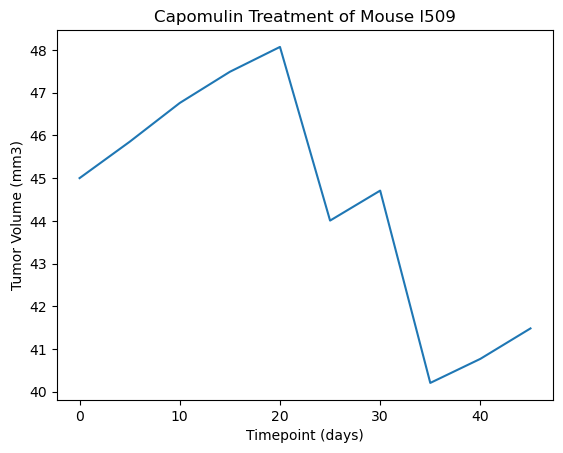

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create variable for mouse l509
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

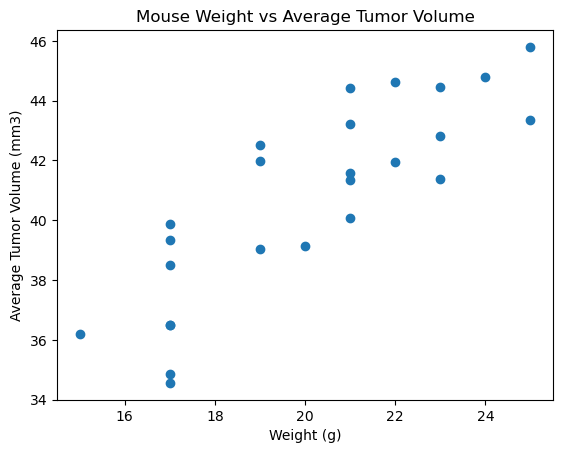

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID'])
average_vol = capomulin_df['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df['Weight (g)'].unique()

plt.scatter(mouse_weight, average_vol, marker='o')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


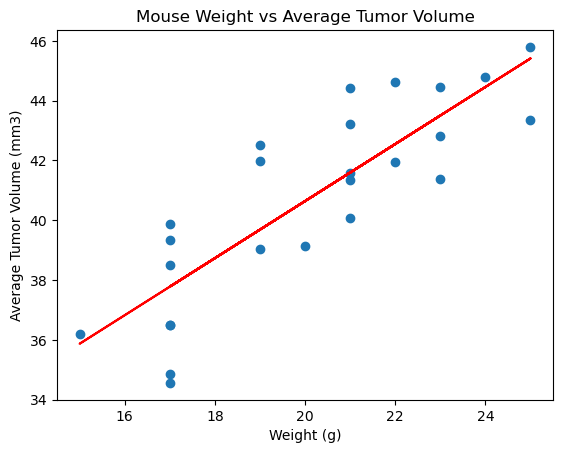

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Mouse weight needs to be converted to float for correlation calc
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight,average_vol)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, average_vol)
plt.plot(mouse_weight, regress_values, "r-")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
plt.show()